<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(Oversampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [3]:
#Loading the clean Dataset
df = pd.read_csv(working_dir_path + 'finaldata.csv')

## **Balancing Data and Modelling**

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['loan_status'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 26166
Resampled dataset shape 44374


In [5]:
x_smote

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,2500.000000,2500.000000,2500.000000,1,141,59.830000,2,13,0,3,...,499.000000,0.000000,0.0,1.0,0,0.0,0.0,0.0,0,0.0
1,10000.000000,10000.000000,10000.000000,0,88,339.310000,2,10,10,3,...,604.000000,600.000000,0.0,1.0,0,0.0,0.0,0.0,0,0.0
2,3000.000000,3000.000000,3000.000000,1,65,67.790000,1,9,1,3,...,694.000000,690.000000,0.0,1.0,0,0.0,0.0,0.0,0,0.0
3,5000.000000,5000.000000,5000.000000,0,318,156.460000,0,3,3,3,...,679.000000,675.000000,0.0,1.0,0,0.0,0.0,0.0,0,0.0
4,7000.000000,7000.000000,7000.000000,1,159,170.080000,2,14,8,3,...,654.000000,650.000000,0.0,1.0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44369,12758.265094,12758.265094,12618.766926,0,126,350.218602,3,16,8,0,...,596.132242,592.132242,0.0,1.0,0,0.0,0.0,0.0,0,0.0
44370,14656.323266,14656.323266,14193.064095,0,217,469.104317,1,5,6,1,...,652.747069,648.747069,0.0,1.0,0,0.0,0.0,0.0,0,0.0
44371,15737.824865,15737.824865,15705.303208,1,143,378.477080,2,14,6,3,...,538.956685,534.956685,0.0,1.0,0,0.0,0.0,0.0,0,0.0
44372,10000.000000,10000.000000,10000.000000,0,193,315.721288,3,22,2,3,...,593.460557,396.124917,0.0,1.0,0,0.0,0.0,0.0,0,0.0


In [6]:
columns = list(df.columns)

In [7]:
columns.pop()

'loan_status'

In [8]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [9]:
balance_df['loan_status'] = y_smote

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

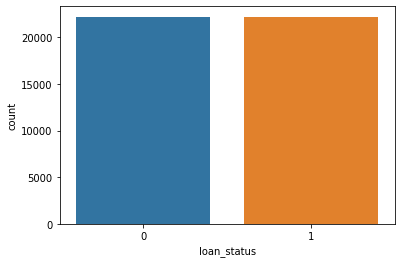

In [10]:
sns.countplot('loan_status', data = balance_df)


In [11]:
balance_df[balance_df['loan_status']==1]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
1,10000.0,10000.0,10000.00,0,88,339.31,2,10,10,3,...,600.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
2,3000.0,3000.0,3000.00,1,65,67.79,1,9,1,3,...,690.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3,5000.0,5000.0,5000.00,0,318,156.46,0,3,3,3,...,675.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
4,7000.0,7000.0,7000.00,1,159,170.08,2,14,8,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
5,3000.0,3000.0,3000.00,0,231,109.43,4,20,9,3,...,685.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26151,17750.0,17750.0,10395.31,0,165,624.74,5,26,4,3,...,600.0,0.0,1.0,0,0.0,0.0,0.0,1,0.0,1
26152,7500.0,7500.0,3581.91,0,148,261.87,5,25,10,0,...,665.0,0.0,1.0,0,0.0,0.0,0.0,1,0.0,1
26158,4800.0,4800.0,2100.00,0,92,163.17,3,19,9,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,1,0.0,1
26159,12750.0,12750.0,2975.00,0,137,443.24,4,24,1,3,...,640.0,0.0,1.0,0,0.0,0.0,0.0,1,0.0,1


In [12]:
df = balance_df.copy()


In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,10000.0,10000.0,10000.0,0,88,339.31,2,10,10,3,...,600.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
2,3000.0,3000.0,3000.0,1,65,67.79,1,9,1,3,...,690.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3,5000.0,5000.0,5000.0,0,318,156.46,0,3,3,3,...,675.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
4,7000.0,7000.0,7000.0,1,159,170.08,2,14,8,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1


In [14]:
features = ['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']

In [15]:
features

['funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low']

In [16]:
from sklearn import preprocessing

In [17]:
dataset_pr = df.copy()
     
from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)
     
y = df['loan_status']
     
X.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,-1.264109,-1.178953,2.225544,-0.139338,-1.372608,0.433736,-1.390414,0.957126,-0.998784,0.487641,...,-1.149319,-0.864782,-0.300771,-0.120982,-0.143614,-1.685840,-0.515410,0.648741,-1.775988,-4.256251
1,0.375204,0.462622,-0.449328,-0.646761,0.631138,-0.054339,1.689939,0.957126,-0.156846,0.487641,...,1.080239,0.759614,2.015650,-0.284186,-0.149959,-0.414453,-0.343308,-2.450790,-0.525123,-0.142207
2,-1.154822,-1.069515,2.225544,-0.866964,-1.315538,-0.217031,-1.082379,0.957126,1.193761,0.487641,...,-0.618358,-0.298811,-0.300771,-0.284186,-0.149959,1.837718,-0.552947,0.648741,0.547048,0.474900
3,-0.717671,-0.631762,-0.449328,1.555265,-0.679814,-1.193181,-0.466308,0.957126,-0.735678,0.487641,...,-0.087859,-0.684942,-0.300771,-0.284186,-0.149959,-0.414453,-0.485472,-1.339002,0.368353,0.372049
4,-0.280521,-0.194008,2.225544,0.032995,-0.582165,0.596427,1.073868,0.957126,-0.253143,-0.843965,...,0.379380,1.601972,-0.300771,-0.284186,-0.149959,0.929585,0.348721,0.648741,0.070527,0.200630


## **Implementing Logistic Regression**

In [18]:
df_log_reg = df.copy()


In [19]:
df_log_reg.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,10000.0,10000.0,10000.0,0,88,339.31,2,10,10,3,...,600.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
2,3000.0,3000.0,3000.0,1,65,67.79,1,9,1,3,...,690.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3,5000.0,5000.0,5000.0,0,318,156.46,0,3,3,3,...,675.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
4,7000.0,7000.0,7000.0,1,159,170.08,2,14,8,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1


In [20]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [21]:
columns = X.columns


In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [24]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [25]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [26]:
optimized_clf = grid_lr_clf.best_estimator_


In [27]:
grid_lr_clf.best_params_


{'C': 1000, 'penalty': 'l2'}

In [28]:
grid_lr_clf.best_score_


0.9994204951534943

In [29]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [30]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [31]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9997424422909759
The accuracy on test data is  0.9999248854503118


In [32]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9999248854503118
The precision on test data is  1.0
The recall on test data is  0.9998497821841671
The f1 on test data is  0.9999248854503118
The roc_score on test data is  0.9999248910920835


[[15522     8]
 [    0 15531]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

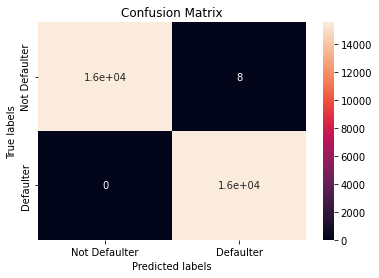

In [33]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [34]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [35]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


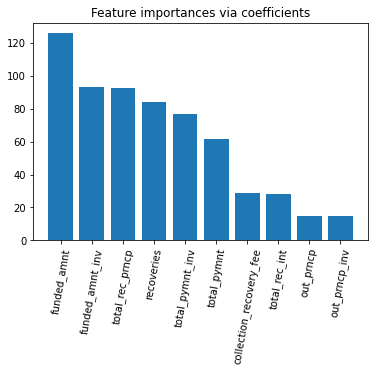

In [36]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [37]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


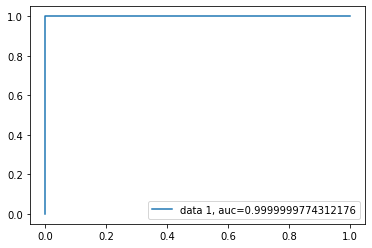

In [38]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing SVC**

In [39]:
# defining parameter range 

param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['rbf']} 

In [40]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [43]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [44]:
optimal_SVC_clf = grid_clf.best_estimator_


In [45]:
grid_clf.best_params_


{'C': 10, 'kernel': 'rbf'}

In [46]:
grid_clf.best_score_


0.9952995489968394

In [47]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [48]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9997424422909759
The accuracy on test data is  0.9999248854503118


In [49]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.9983474799068579
The precision on test data is  0.9978966346153846
The recall on test data is  0.998796992481203
The f1 on test data is  0.9983466105516309
The roc_score on test data is  0.9983479184228018


[[15527     3]
 [    0 15531]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

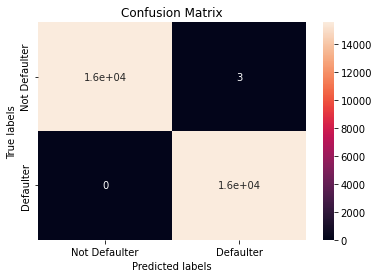

In [50]:
 # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [51]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [52]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]


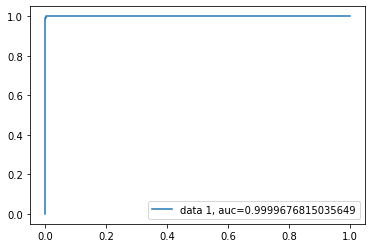

In [53]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Implementing Decision Tree**

In [54]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [55]:
from sklearn.tree import DecisionTreeClassifier  


In [56]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [58]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [59]:
grid_DTC_clf.best_score_


0.9666784091339418

In [60]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_


In [61]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [62]:
grid_DTC_clf.best_params_


{'max_depth': 20, 'min_samples_split': 0.1}

In [63]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.9677730916583497
The accuracy on test data is  0.9688274618793661


## **Implementing RandomForest**

In [64]:
from sklearn.ensemble import RandomForestClassifier


In [65]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [66]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [68]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9976714489596635


In [69]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9976714489596635
The precision on test data is  1.0
The recall on test data is  0.9953641393749065
The f1 on test data is  0.9976766844038072
The roc_score on test data is  0.9976820696874533


In [70]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [71]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [72]:
grid_rf_clf.best_score_


0.9969736792916319

In [73]:
grid_rf_clf.best_params_


{'max_depth': 30, 'n_estimators': 100}

In [74]:
optimal_rf_clf = grid_rf_clf.best_estimator_


In [75]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [76]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9976714489596635


In [77]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9976714489596635
The precision on test data is  0.9998497596153846
The recall on test data is  0.9955123410620793
The f1 on test data is  0.9976763361067387
The roc_score on test data is  0.9976807329933208


In [78]:
len(optimal_rf_clf.feature_importances_)


49

In [79]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [80]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]


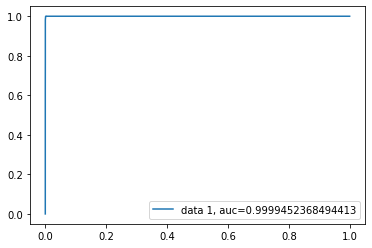

In [81]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing XGBoost**

In [82]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [83]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [84]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [85]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[21:17:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [86]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=5, microseconds=896402)

In [87]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [88]:
len(train_class_preds_probs)


31061

In [89]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [90]:
test_class_preds_probs[:20]


array([0.93922436, 0.03182393, 0.95856804, 0.95856804, 0.9357413 ,
       0.95856804, 0.95856804, 0.95856804, 0.95696545, 0.886534  ,
       0.04044211, 0.9533578 , 0.04044211, 0.04044211, 0.04044211,
       0.04044211, 0.95856804, 0.95856804, 0.945664  , 0.9582334 ],
      dtype=float32)

In [91]:
test_class_preds[:20]


[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [92]:
len(y_train)


31061

In [93]:
len(train_class_preds)


31061

In [94]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9972956440552462
The accuracy on test data is  0.9963193870652746


In [95]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9963193870652746
The precision on test data is  0.9998497596153846
The recall on test data is  0.9928390273012084
The f1 on test data is  0.9963320607829927
The roc_score on train data is  0.9963438706854


## **Hyperparameter Tuning**

In [96]:
from xgboost import  XGBClassifier


In [97]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [99]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [100]:
 gsearch1.best_score_

0.9983379813515874

In [101]:
optimal_xgb = gsearch1.best_estimator_

In [102]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [103]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.999859150961999
The accuracy on test data is  0.9987605633802817


In [104]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9987605633802817
The precision on test data is  1.0
The recall on test data is  0.9975269784172662
The f1 on test data is  0.9987619583567812
The roc_score on train data is  0.9987634892086331


In [105]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

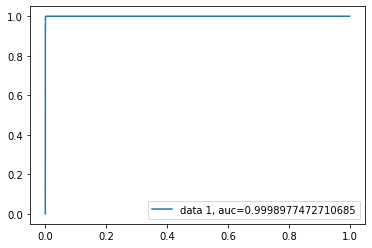

In [106]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Artificial Neural Networks (ANNs)**

In [107]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (accuracy_score,  confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


In [108]:
X_train, y_train = df_log_reg.drop('loan_status', axis=1), df.loan_status
X_test, y_test = df_log_reg.drop('loan_status', axis=1), df.loan_status

In [109]:
X_train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                        int64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
pymnt_plan                      int64
purpose                         int64
title                           int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
fico_range_low                  int64
fico_range_high                 int64
inq_last_6mths                float64
open_acc                      float64
pub_rec                         int64
revol_bal                     float64
revol_util                      int64
total_acc   

In [110]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [112]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [113]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [114]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1387/1387 [==============================] - 11s 6ms/step - loss: 0.1319 - AUC: 0.9890 - val_loss: 0.0487 - val_AUC: 0.9988
Epoch 2/20
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0943 - AUC: 0.9941 - val_loss: 0.0389 - val_AUC: 0.9994
Epoch 3/20
1387/1387 [==============================] - 8s 6ms/step - loss: 0.0754 - AUC: 0.9961 - val_loss: 0.0301 - val_AUC: 0.9996
Epoch 4/20
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0665 - AUC: 0.9968 - val_loss: 0.0281 - val_AUC: 0.9997
Epoch 5/20
1387/1387 [==============================] - 8s 6ms/step - loss: 0.0603 - AUC: 0.9971 - val_loss: 0.0202 - val_AUC: 0.9998
Epoch 6/20
1387/1387 [==============================] - 8s 5ms/step - loss: 0.0575 - AUC: 0.9975 - val_loss: 0.0285 - val_AUC: 0.9997
Epoch 7/20
1387/1387 [==============================] - 8s 6ms/step - loss: 0.0536 - AUC: 0.9978 - val_loss: 0.0419 - val_AUC: 0.9997
Epoch 8/20
1387/1387 [==============================] - 10s 8

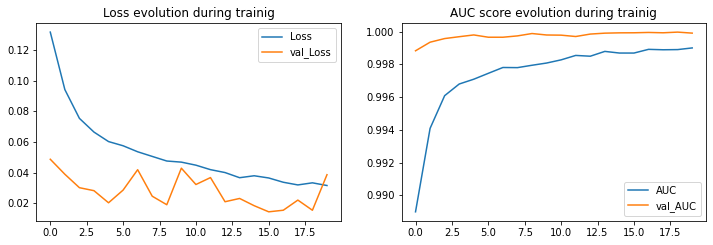

In [115]:
plot_learning_evolution(r)

In [116]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

1387/1387 [==============================] - 2s 1ms/step
Train Result:
Accuracy Score: 98.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.971822      0.999490  0.985262      0.985656      0.985656
recall         0.999504      0.971019  0.985262      0.985262      0.985262
f1-score       0.985469      0.985049  0.985262      0.985259      0.985259
support    22187.000000  22187.000000  0.985262  44374.000000  44374.000000
_______________________________________________
Confusion Matrix: 
 [[22176    11]
 [  643 21544]]



In [117]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

1387/1387 [==============================] - 2s 2ms/step
Test Result:
Accuracy Score: 98.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.971822      0.999490  0.985262      0.985656      0.985656
recall         0.999504      0.971019  0.985262      0.985262      0.985262
f1-score       0.985469      0.985049  0.985262      0.985259      0.985259
support    22187.000000  22187.000000  0.985262  44374.000000  44374.000000
_______________________________________________
Confusion Matrix: 
 [[22176    11]
 [  643 21544]]



In [118]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

1387/1387 [==============================] - 2s 2ms/step
